In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
%run data_filter.ipynb

### Földrajzi adatok beolvasása

In [3]:
data = (
    gpd
    .read_file(
        filename='taxi_zones/taxi_zones.shp',
        ignore_fields=['Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough']
    )
    .set_index('OBJECTID')
    .rename_axis('LocationID')
)

data[['PUFrequency', 'DOFrequency']] = 0.

### Körzetadatok összegzése

In [4]:
pickup_frequency = (
    monthly_data
    .PULocationID
    .value_counts()
    .reindex_like(data)
)

dropoff_frequency = (
    monthly_data
    .DOLocationID
    .value_counts()
    .reindex_like(data)
)

### Logaritmus vétel és hiányzó adatok kitöltése

In [5]:
data['PUFrequency'] += np.log(pickup_frequency).fillna(value=0)
data['DOFrequency'] += np.log(dropoff_frequency).fillna(value=0)

### Kirajzolás

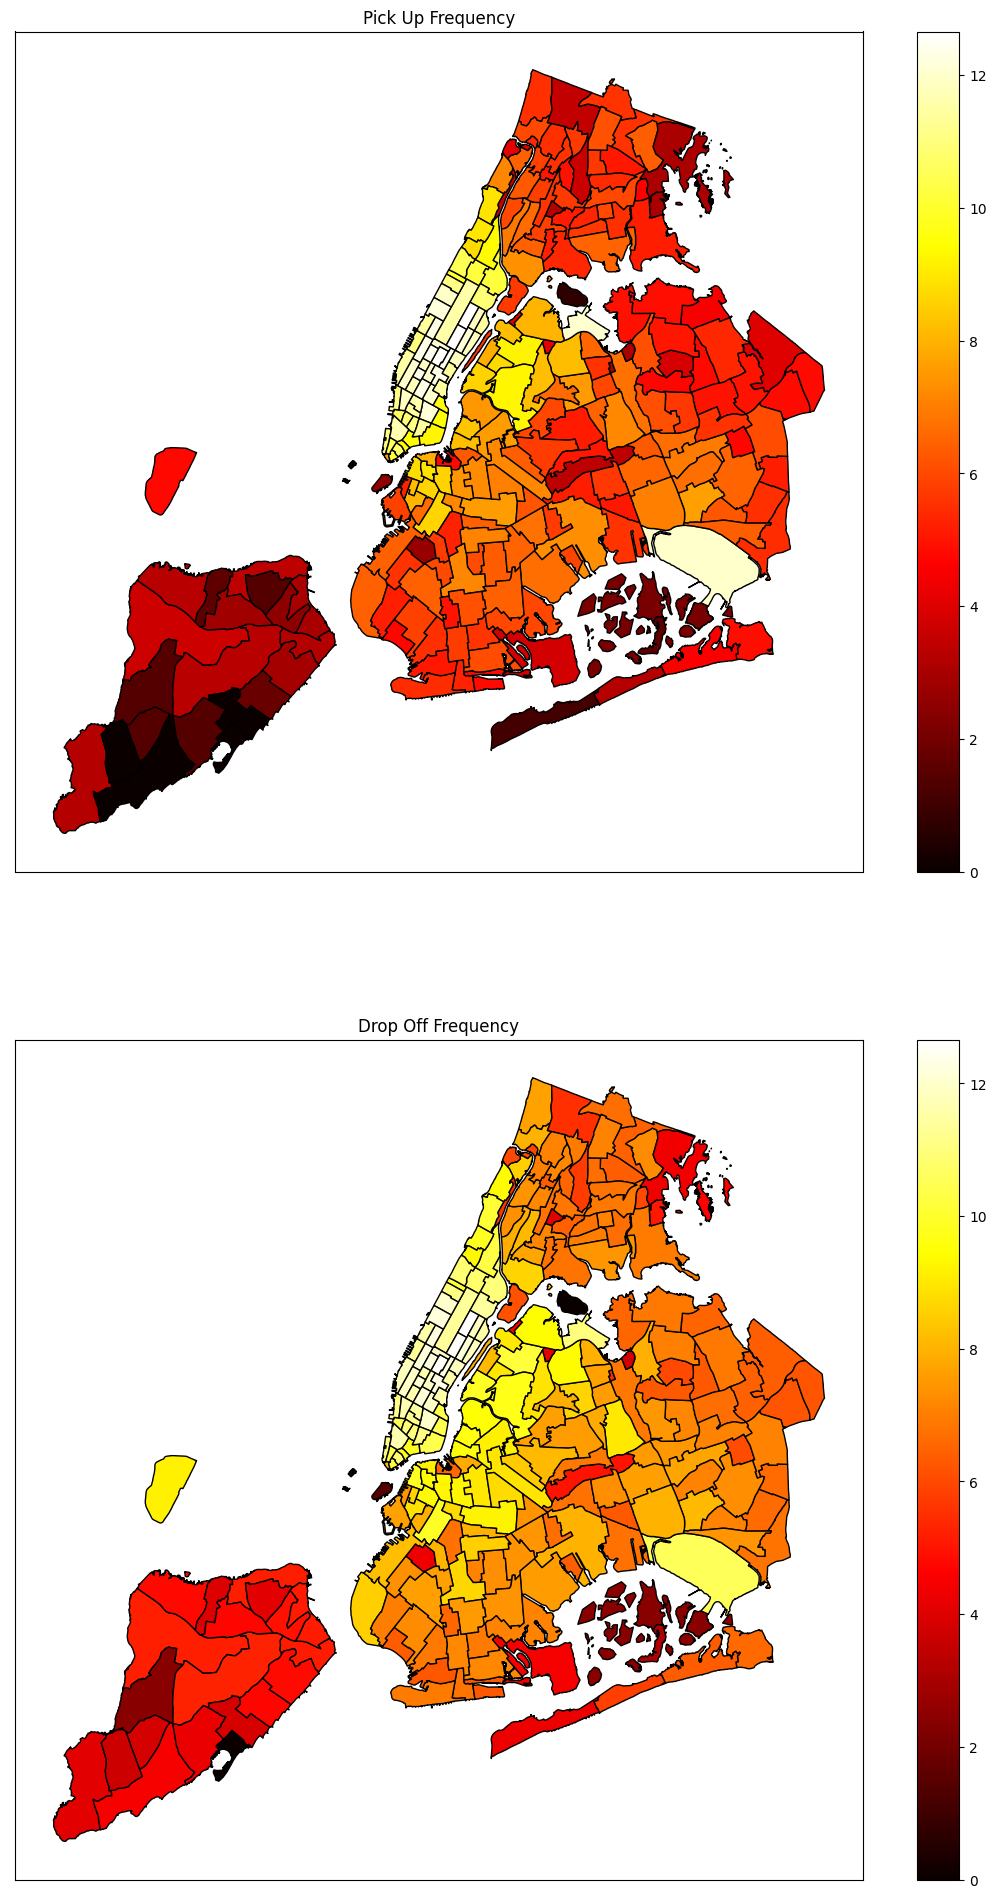

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(14, 24))

ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].set_xticks([])
ax[1].set_yticks([])

ax[0].title.set_text('Pick Up Frequency')
ax[1].title.set_text('Drop Off Frequency')

data.plot(
    cmap='hot',
    column='PUFrequency',
    ax=ax[0],
    legend=True,
    edgecolor='black'
)

data.plot(
    cmap='hot',
    column='DOFrequency',
    ax=ax[1],
    legend=True,
    edgecolor='black'
)

plt.show()